In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading train and test csv files 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### Gathering information from the train and test data

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#dropping first unnecessary column
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
#fixing NULL values of train data

In [12]:
#filling null EMBARKED with the max count of Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train['Embarked'].fillna('S',inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
#generating random train age on the basis of mean and SD 
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [16]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
#fixing null values of test data

In [19]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [20]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [21]:
#generating random test age on the basis of mean and SD 
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [22]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [23]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Exploratory Data Analysis

In [24]:
train[train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [25]:
#Gathering passengers count as per Pclass
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [27]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [28]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\2298796072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'],kde=True)


<Axes: xlabel='Age', ylabel='Density'>

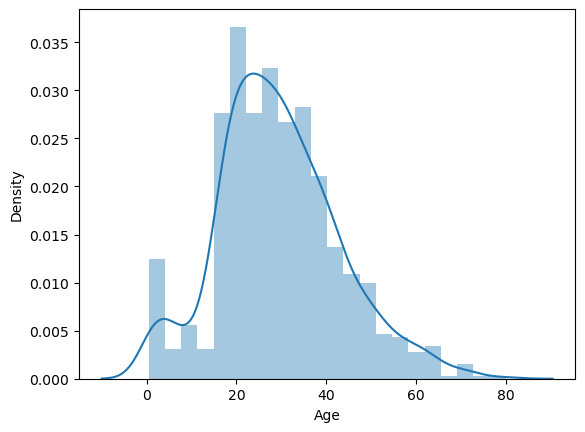

In [29]:
sns.distplot(train['Age'],kde=True)
#we found a bimodal distribution which represents the passengers of all age group

In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\4165753420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\4165753420.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

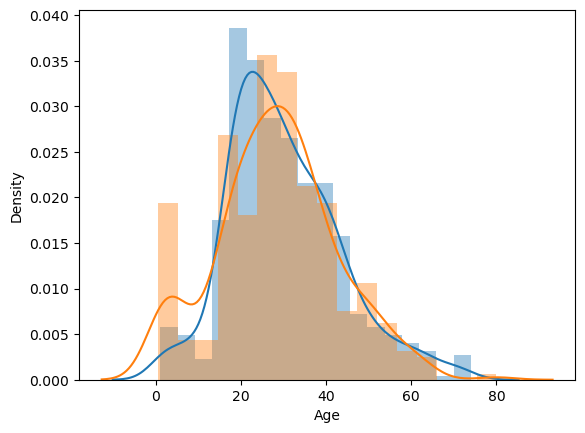

In [32]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])
#we found a bimodal distribution which represents the passengers of all age group, who survived and could not survive.

#### from the above graph ,we can conclude that the passengers of age around 40 have higher chances of not surviving, rather than children and senior citizens

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_23264\2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1]

<Axes: xlabel='Fare', ylabel='Density'>

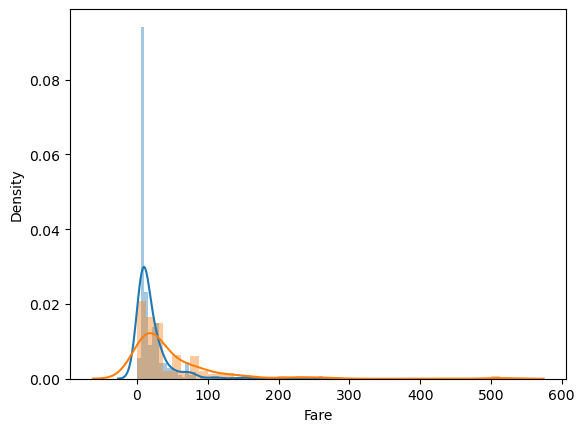

In [33]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

#### The above graph states that passengers who've paid more fare , have higher chance of surviving

In [34]:
#dropping Ticket coloumn
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [35]:
#merging the sibsp and parch columns to 'Family' 
train['family']=train['SibSp']+train['Parch']+1
test['family']=test['SibSp']+test['Parch']+1

In [36]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [37]:
test['family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: family, dtype: int64

In [38]:
#grouping Survived column by family to check survival chance
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [39]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family         0
dtype: int64

In [40]:
#defining a function to determine family_size
def cal(num):
    if num==1:
        return 'Small'
    elif num>1 and num<5:
        return 'Medium'
    else:
        return 'Large'

In [41]:
train['family_size']=train['family'].apply(cal)

In [42]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Small
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium


In [43]:
test['family_size']=test['family'].apply(cal)

In [44]:
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Small
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Small
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Small


In [45]:
#passengerID is not required as per EDA , but for information purpose it is saved for test.csv

In [46]:
passengerId=test['PassengerId'].values

In [47]:
#removing the unnecessary columns- 'Name','PassengerId','SibSp','Parch','family'

In [48]:
train.drop(columns=['Name','PassengerId','SibSp','Parch','family'],inplace=True)
test.drop(columns=['Name','PassengerId','SibSp','Parch','family'],inplace=True)

In [49]:
#train.isnull().sum()

In [50]:
#test.isnull().sum()

In [51]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [52]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Small
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Small


In [53]:
test.head(5)

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,34.5,7.8292,Q,Small
1,3,female,47.0,7.0000,S,Medium
2,2,male,62.0,9.6875,Q,Small
3,3,male,27.0,8.6625,S,Small
4,3,female,22.0,12.2875,S,Medium


In [54]:
train.shape

(891, 7)

### Converting All categorical data into Numerical Data 

In [55]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [56]:
train.shape

(891, 10)

In [57]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Medium,family_size_Small
0,0,22.0,7.2500,0,1,1,0,1,1,0
1,1,38.0,71.2833,0,0,0,0,0,1,0
2,1,26.0,7.9250,0,1,0,0,1,0,1
3,1,35.0,53.1000,0,0,0,0,1,1,0
4,0,35.0,8.0500,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,1
887,1,19.0,30.0000,0,0,0,0,1,0,1
888,0,39.0,23.4500,0,1,0,0,1,1,0
889,1,26.0,30.0000,0,0,1,0,0,0,1


In [58]:
test.shape

(418, 6)

In [59]:
#
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [60]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Medium,family_size_Small
0,34.5,7.8292,0,1,1,1,0,0,1
1,47.0,7.0000,0,1,0,0,1,1,0
2,62.0,9.6875,1,0,1,1,0,0,1
3,27.0,8.6625,0,1,1,0,1,0,1
4,22.0,12.2875,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,22.0,8.0500,0,1,1,0,1,0,1
414,39.0,108.9000,0,0,0,0,0,0,1
415,38.5,7.2500,0,1,1,0,1,0,1
416,18.0,8.0500,0,1,1,0,1,0,1


In [61]:
test.shape

(418, 9)

### Applying algorithm to train data and predict Survival of passengers of Titanic

In [62]:
x=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [65]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [66]:
Y_pred=classifier.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.770949720670391

In [68]:
#extracting test data

In [69]:
x_final=test.iloc[:,:].values

In [70]:
#applying prediction over test data

In [71]:
y_final=classifier.predict(x_final)

In [72]:
y_final.shape

(418,)

In [73]:
passengerId.shape

(418,)

In [74]:
#we'll place the passengerId and y_final in a new DataFrame 

In [75]:
#creating new dataframe
final=pd.DataFrame()

In [76]:
final['PassengerId']=passengerId
final['Survived']=y_final

In [77]:
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
#converting into .csv files
final.to_csv('Survival.csv',index=False)